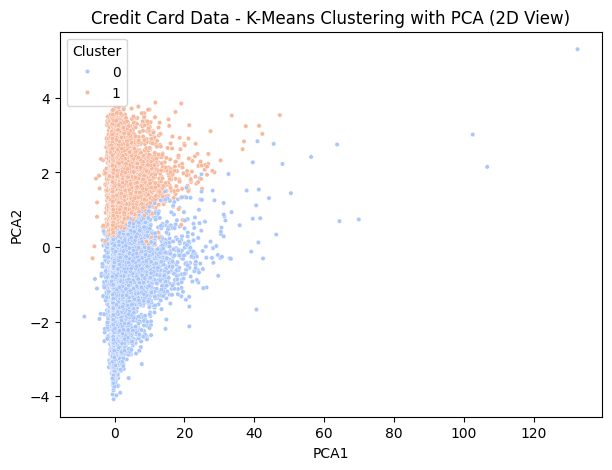


 Cluster vs Actual Class Comparison:
Class         0    1
Cluster             
0        155038  299
1        129277  193

Cluster Centers (first 5 PCA components):
[[-0.76239761 -0.18732574  0.0066125   0.47136085  0.09269767]
 [ 0.91779379  0.22550753 -0.00796029 -0.56743628 -0.11159183]]


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df = pd.read_csv('/content/creditcard.csv')
df = df.dropna()
X = df.drop('Class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]
plt.figure(figsize=(7,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='coolwarm', s=10)
plt.title("Credit Card Data - K-Means Clustering with PCA (2D View)")
plt.show()
comparison = pd.crosstab(df['Cluster'], df['Class'])
print("\n Cluster vs Actual Class Comparison:")
print(comparison)
print("\nCluster Centers (first 5 PCA components):")
print(kmeans.cluster_centers_[:,:5])
